In [1]:
"""
source: https://github.com/LauraGomezNavarro/OceanParcels_Lyapunov/blob/main/code/FTLE_func_test.py
Author: Laura Gomez Navarro
"""
import numpy as np
import xarray as xr
from datetime import timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors

In [2]:
home_folder = '/nethome/manra003/analysis/dispersion/'
mon_name ='Dec'
year=2016
ds = xr.open_zarr(home_folder + 'simulations/Benguela_0625_401x257_{0}01-31_{1}.zarr'.format(mon_name, year))
ds

<xarray.Dataset>
Dimensions:     (trajectory: 103057, obs: 31)
Coordinates:
  * obs         (obs) int32 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30
  * trajectory  (trajectory) int64 0 1 2 3 4 ... 103053 103054 103055 103056
Data variables:
    lat         (trajectory, obs) float64 dask.array<chunksize=(103057, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 dask.array<chunksize=(103057, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] dask.array<chunksize=(103057, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 dask.array<chunksize=(103057, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.1-112-g182e3085

In [6]:
ds.time[1000,:].values

/nethome/manra003/.conda/envs/dispersion/lib/python3.11/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/nethome/manra003/.conda/envs/dispersion/lib/python3.11/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/nethome/manra003/.conda/envs/dispersion/lib/python3.11/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/nethome/manra003/.conda/envs/dispersion/lib/python3.11/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/nethome/manra003/.conda/envs/dispersion/lib/python3.11/site-packages/xarray/coding/times.py

array(['2016-12-01T12:00:00.000000000', '2016-12-02T12:00:00.000000000',
       '2016-12-03T12:00:00.000000000', '2016-12-04T12:00:00.000000000',
       '2016-12-05T12:00:00.000000000', '2016-12-05T20:35:00.000000000',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',                           'NaT',
                                 'NaT',            

In [10]:
year = 2015
dates = 'Dec01-16'
home_folder = '/nethome/manra003/analysis/dispersion/'
output_folder = home_folder+ 'outputs/ftle/'

ds = np.load(output_folder + 'FTLE_BU_0625_401x257_{0}_{1}.npz'.format(dates, year))
FTLE_f = ds['FTLE_f']
print(np.nanmin(FTLE_f), np.nanmax(FTLE_f))

coords = np.load(home_folder + 'Benguela_0pt0625_FULLm_release_points.npz')

-0.038990678506661956 0.34984702596358536


In [4]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,0,:,:]

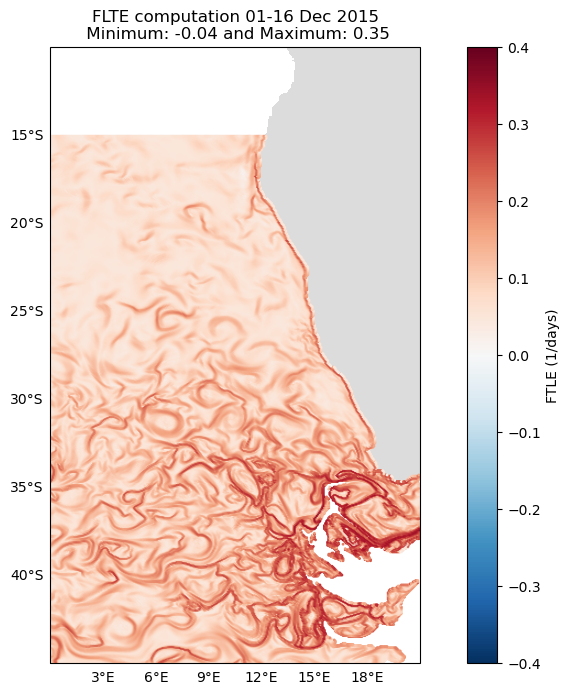

In [12]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
ax.set_xlim(0,21)
ax.set_ylim(-45,-10)
colormap = colors.ListedColormap(['gainsboro', 'white'])
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)

plt.scatter(coords['Longitude'], coords['Latitude'], c=FTLE_f, cmap='RdBu_r', s=1)
plt.title('FLTE computation 01-16 Dec {1}\n Minimum: {2} and Maximum: {3}'.format(dates, year, np.round(np.nanmin(FTLE_f),2), np.round(np.nanmax(FTLE_f),2)))
cbar = plt.colorbar()
cbar.set_label("FTLE (1/days)")
plt.clim(-0.4, 0.4)

plt.savefig(output_folder + "Benguela_0pt0625_FULLm_{0}_{1}.jpeg".format(dates, year))


In [12]:
def ftle_brunton_2009(J, Td):  # http://cwrowley.princeton.edu/papers/BruntonChaos09.pdf
    D = np.dot(np.transpose(J), J)  # Cauchy–Green strain tensor
    lamda = LA.eigvals(D)
    lam_max = max(lamda)
    ftle = (1 / Td) * np.log(np.sqrt(lam_max))
    return ftle


def dist_pairs_km(inlon1, inlon2, inlat1, inlat2):
    """
    source: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

    """
    # approximate radius of earth in km
    R = 6373.0

    lon1 = radians(inlon1)
    lat1 = radians(inlat1)
    lon2 = radians(inlon2)
    lat2 = radians(inlat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance



In [13]:
home_folder = '/nethome/manra003/analysis/dispersion/'

year = 2015
# dates = 'Aug1-16'
# dates = 'Aug16-31'
# dates = 'Sep01-16'
dates = 'Dec1-Dec16'

ds = xr.open_zarr(home_folder + 'test/Benguela_0pt0625_FULLm_Dec01-30_2015.zarr')

output_dt = timedelta(hours=6)  # from the simulation

Td = 15
out_index = Td * 4
time_range = np.arange(np.nanmin(ds['time'].values),
                       np.nanmax(ds['time'].values) + np.timedelta64(output_dt),
                       output_dt)
print(time_range[0], time_range[out_index])


2015-12-01T12:00:00.000000000 2015-12-16T12:00:00.000000000


In [7]:
ds1

<xarray.Dataset>
Dimensions:     (trajectory: 162097, obs: 121)
Coordinates:
  * obs         (obs) int32 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119 120
  * trajectory  (trajectory) int64 0 1 2 3 4 ... 162093 162094 162095 162096
Data variables:
    lat         (trajectory, obs) float64 dask.array<chunksize=(162097, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 dask.array<chunksize=(162097, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] dask.array<chunksize=(162097, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 dask.array<chunksize=(162097, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.1-112-g182e3085

In [20]:
# step = 0.25
# left_lon = 0
# right_lon = 20
# top_lat = -10
# bottom_lat = -40

# # add step later - also in the released particles
# lons_list = np.arange(left_lon, right_lon + step, step)
# lats_list = np.arange(bottom_lat, top_lat + step, step)

# grid_lons, grid_lats = np.meshgrid(lons_list, lats_list)


In [18]:
step = 0.0625
coords = np.load('/nethome/manra003/analysis/dispersion/Benguela_0pt0625_FULLm_release_points.npz')

# grid_lons, grid_lats = np.meshgrid(coords['Longitude'], coords['Latitude'])
grid_lons, grid_lats=ds['lon'][:, 0], ds['lat'][:, 0]

In [17]:
ds['lon'][:, 0].shape, grid_lons.shape[0], grid_lons.shape[1]

((7639,), 121, 81)

In [19]:
coords['Longitude'].shape

(481, 337)

In [20]:
# initial position
x0 = np.reshape(ds['lon'][:, 0].data, (coords['Longitude'].shape[0], coords['Longitude'].shape[1]))
y0 = np.reshape(ds['lat'][:, 0].data, (coords['Longitude'].shape[0], coords['Longitude'].shape[1]))

# final position

x1 = np.reshape(ds['lon'][:, out_index].data, (coords['Longitude'].shape[0], coords['Longitude'].shape[1]))
y1 = np.reshape(ds['lat'][:, out_index].data, (coords['Longitude'].shape[0], coords['Longitude'].shape[1]))


In [21]:
# # initial position
# x0 = np.reshape(ds['lon'][:, 0].data, (grid_lons.shape[0], grid_lons.shape[1]))
# y0 = np.reshape(ds['lat'][:, 0].data, (grid_lats.shape[0], grid_lats.shape[1]))

# # final position

# x1 = np.reshape(ds['lon'][:, out_index].data, (grid_lons.shape[0], grid_lons.shape[1]))
# y1 = np.reshape(ds['lat'][:, out_index].data, (grid_lats.shape[0], grid_lats.shape[1]))

H = x0.shape[0]
L = x1.shape[1]

FTLE_f = np.ones_like(np.asarray(x0))
FTLE_f[:,:] = np.NaN

J = np.empty([2, 2], float) * np.nan

type(FTLE_f), type(J)


(numpy.ndarray, numpy.ndarray)

In [22]:
# 1, H-1 --> to ignore bordersx for now
for i in range(1, H - 1):  # 0, H-2
    for j in range(1, L - 1):  # 0, L-2
        J[0][0] = dist_pairs_km(x1[i, j], x1[i - 1, j], y1[i, j], y1[i - 1, j]) / dist_pairs_km(x0[i, j], x0[i - 1, j],
                                                                                                y0[i, j], y0[i - 1, j])
        J[0][1] = dist_pairs_km(x1[i, j], x1[i, j - 1], y1[i, j], y1[i, j - 1]) / dist_pairs_km(x0[i, j], x0[i, j - 1],
                                                                                                y0[i, j], y0[i, j - 1])
        J[1][0] = dist_pairs_km(x1[i, j], x1[i, j + 1], y1[i, j], y1[i, j + 1]) / dist_pairs_km(x0[i, j], x0[i, j + 1],
                                                                                                y0[i, j], y0[i, j + 1])
        J[1][1] = dist_pairs_km(x1[i, j], x1[i + 1, j], y1[i, j], y1[i + 1, j]) / dist_pairs_km(x0[i, j], x0[i + 1, j],
                                                                                                y0[i, j], y0[i + 1, j])

        if np.isnan(J).any():
            continue
        elif np.all((J == 1.0)):  # identify all land points- static points: No dispersion?
            continue
        else:
            f_value = ftle_brunton_2009(J, Td)
            FTLE_f[i][j] = f_value
print(np.nanmin(FTLE_f), np.nanmax(FTLE_f))

KeyboardInterrupt: 

In [ ]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,0,:,:]

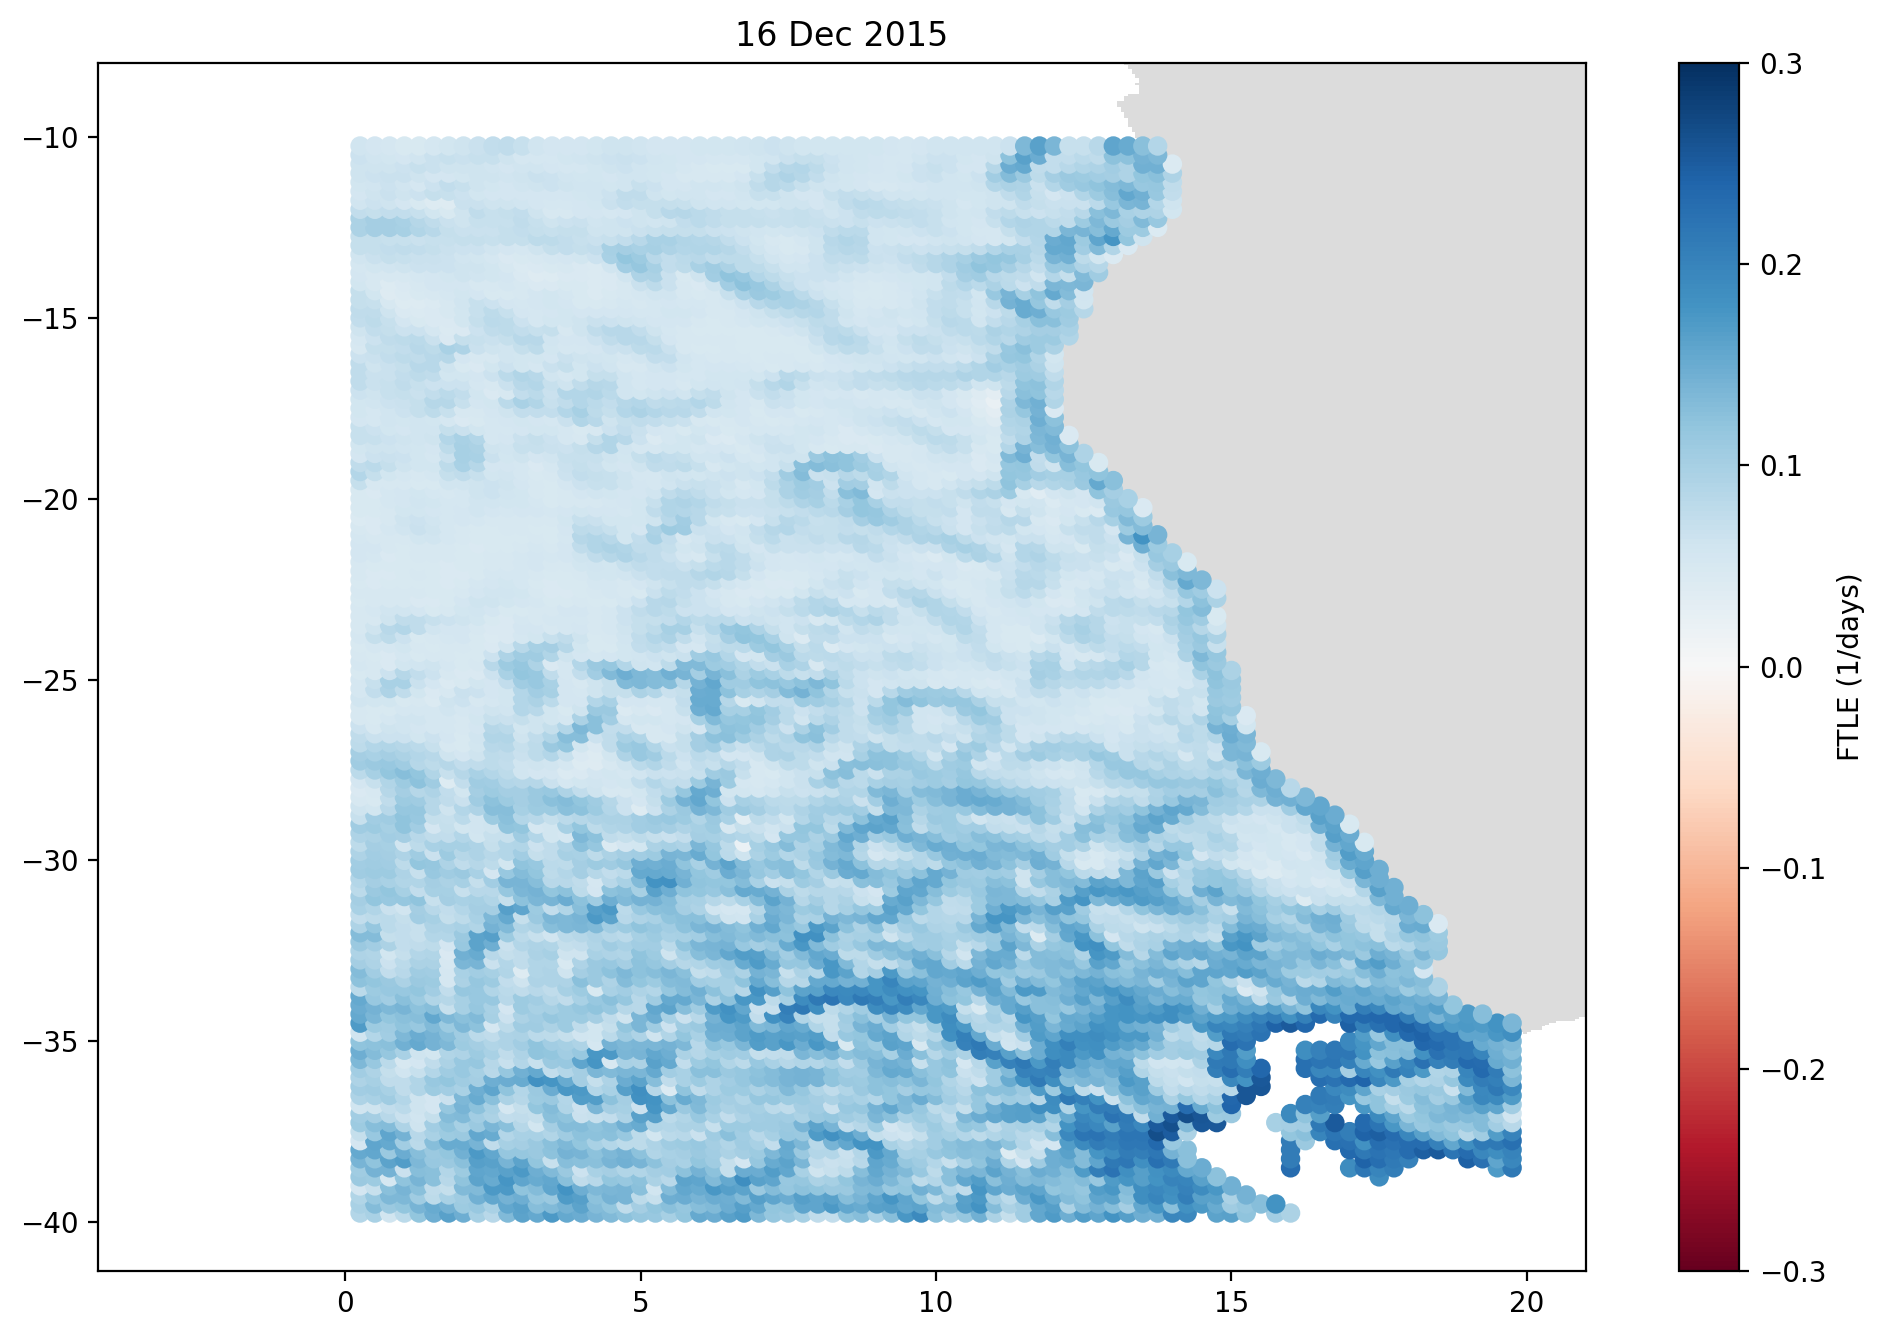

In [59]:

# we need to coordinates file to access the corner points - glamf/gphif


fig = pyplot.figure(figsize=(12,8), dpi=200)
ax = pyplot.axes()
colormap = colors.ListedColormap(['gainsboro', 'white'])
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)

pyplot.scatter(grid_lons, grid_lats, c=FTLE_f, cmap='RdBu')
pyplot.title('16 Dec {1}'.format(dates, 2015))
cbar = pyplot.colorbar()
cbar.set_label("FTLE (1/days)")
pyplot.clim(-0.3, 0.3)

pyplot.show()


In [3]:
coords = np.load('/nethome/manra003/analysis/dispersion/Benguela_0pt0625_FULLm_release_points.npz')


In [11]:
coords['Longitude']

array([ 0.    ,  0.0625,  0.125 , ..., 20.875 , 20.9375, 21.    ])